# apply_padded
an example for the use of porespy.filters.apply_padded

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage

Adds padding to an input image, then applies the function selected by "func".

Create input image and variables:

--------------------------------------------------------------------------------
RSA: Adding spheres of size 20
Initial volume fraction: 0.0
Dilating foreground features by sphere radius
Number of spheres inserted: 15
Final volume fraction: 0.2075
--------------------------------------------------------------------------------
RSA: Adding spheres of size 10
Initial volume fraction: 0.2075
Dilating foreground features by sphere radius
Number of spheres inserted: 57
Final volume fraction: 0.40066666666666667


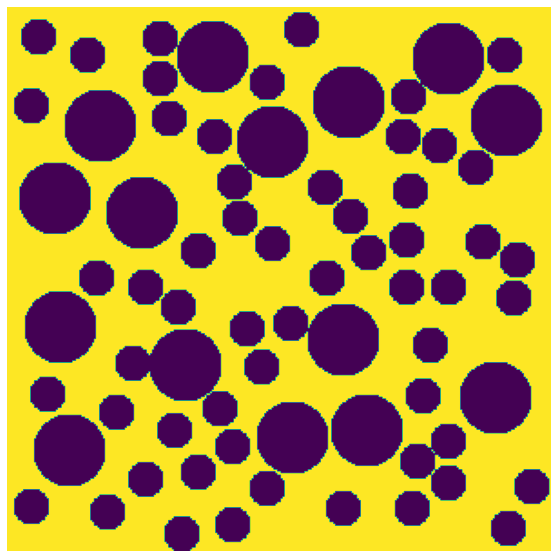

In [2]:
im = np.zeros([300, 300])
im = ps.generators.RSA(im, radius=20, volume_fraction=0.2)
im = ps.generators.RSA(im, radius=10, volume_fraction=0.4)
im = im == 0
pad_width = 10
pad_val=1

plt.figure(figsize=[10, 10])
plt.axis(False)
plt.imshow(im)

Apply filter using skimage.morphology.skeletonize_3d as the func input:

In [3]:
x = ps.filters.apply_padded(im, pad_width, skimage.morphology.skeletonize_3d, pad_val)

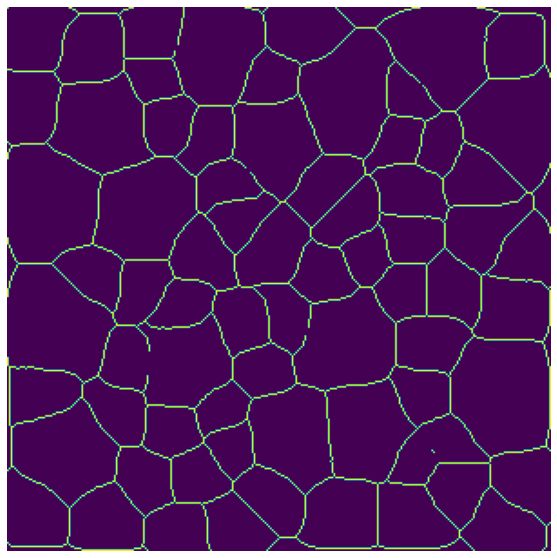

In [4]:
plt.figure(figsize=[10, 10])
plt.axis(False)
plt.imshow(x)